<a href="https://colab.research.google.com/github/YopaNelly/AI-ML-Basics/blob/main/Sentiment_Analysis_with_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART 2**

# **Sentiment Analysis with Transformers**


In [2]:
# Install the required library
!pip install transformers

# Import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import tensorflow as tf


In [3]:

df = pd.read_csv("DisneylandReviews.csv", encoding='latin-1')
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [4]:
# drop the other columns and work only with Rating	and Review_Text

df = df[['Rating',  'Review_Text']]
df.head()


,Rating,Review_Text
0,4,If you've ever been to Disneyland anywhere you...
1,4,Its been a while since d last time we visit HK...
2,4,Thanks God it wasn t too hot or too humid wh...
3,4,HK Disneyland is a great compact park. Unfortu...
4,4,"the location is not in the city, took around 1..."


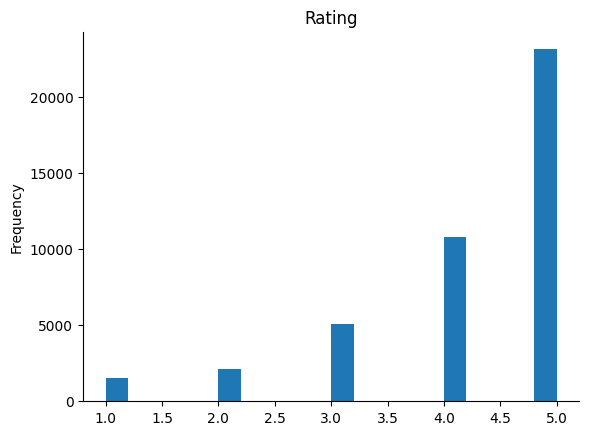

In [5]:
# @title Rating

from matplotlib import pyplot as plt
df['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
df["Rating"].unique()

array([4, 3, 5, 2, 1])

In [7]:
df.dtypes

,0
Rating,int64
Review_Text,object


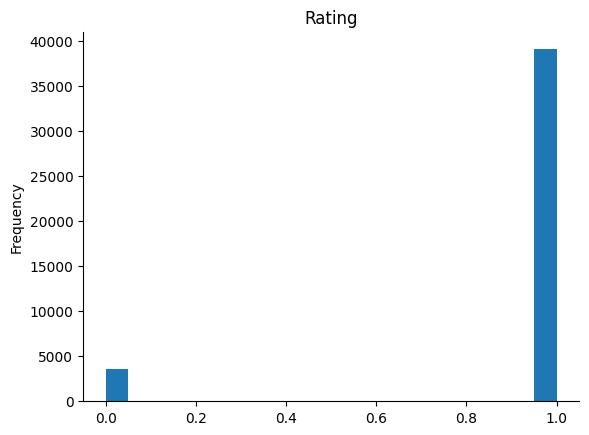

In [8]:
# group the rating in to 2 groups ie: 3, 4 and 5 to 1 and 1 and 2 becomes 0

def transform_rating(rating):
  if rating >=3:
    return 1
  else:
    return 0
df['Rating'] = df['Rating'].apply(transform_rating)
df['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)


In [9]:
df.head()

,Rating,Review_Text
0,1,If you've ever been to Disneyland anywhere you...
1,1,Its been a while since d last time we visit HK...
2,1,Thanks God it wasn t too hot or too humid wh...
3,1,HK Disneyland is a great compact park. Unfortu...
4,1,"the location is not in the city, took around 1..."


In [10]:
df.isnull().sum()

,0
Rating,0
Review_Text,0


In [11]:
# Preprocess the text
X = df['Review_Text'].values
y = df['Rating'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Load the pre-trained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize the data
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(X_val.tolist(), truncation=True, padding=True, max_length=128)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [13]:
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), y_val))

# Fine-tune the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.fit(train_dataset.shuffle(1000).batch(16),
          epochs=1,
          batch_size=16,
          validation_data=val_dataset.batch(16))


   6/2133 [..............................] - ETA: 14:33:05 - loss: 0.4686 - accuracy: 0.8854

# **Result and Evaluation**

The Transformer model is being trained with a batch size of 16 for 1 epoch.
The current progress indicates that out of 2133 steps, 205 have been completed.
The model has a loss of 0.1772, meaning it is making relatively small errors, and an accuracy of 93.14%, indicating that the model is correctly predicting most of the time during this training phase. However, the training is expected to take a significant amount of time, with an estimated remaining time of over 13 hours.


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(val_dataset.batch(16))
print(f'Validation Accuracy: {accuracy:.2f}')
